[EP02]날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?


##목차##

#1_프로젝트 1 

    (1) 데이터 가져오기
    (2) 모델에 입력할 데이터 X 준비하기
    (3) 모델에 예측할 데이터 y 준비하기
    (4) train 데이터와 test 데이터로 분리하기
    (5) 모델 준비하기
    (6) 손실함수 loss 정의하기
    (7) 기울기를 구하는 gradient 함수 구현하기
    (8) 하이퍼 파라미터인 학습률 설정하기
    (9) 모델 학습하기
    (10) test 데이터에 대한 성능 확인하기
    (11) 정답 데이터와 예측한 데이터 시각화하기
    x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.


#2_프로젝트 2 :

(1) 데이터 가져오기
터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
여기에서 데이터를 상세히 확인할 수 있습니다.
(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
to_datetime 활용 : 링크 참조
pandas datetime extract year month day 키워드로 검색해 보기
(3) year, month, day, hour, minute, second 데이터 개수 시각화하기
sns.countplot 활용해서 시각화하기
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
(4) X, y 컬럼 선택 및 train/test 데이터 분리
X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

(5) LinearRegression 모델 학습
sklearn의 LinearRegression 모델 불러오기 및 학습하기
(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
학습된 모델에 X_test를 입력해서 예측값 출력하기
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
mse 값과 함께 rmse 값도 계산하기
(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기



3_회고



In [1]:
#(1)데이터 가져오기
#sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
#diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

import sklearn
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


diabetes=load_diabetes()

df_X=diabetes.data
df_y=diabetes.target

#데이터 확인
print(df_X.shape, df_y.shape)
print(diabetes.keys())
print(diabetes.feature_names)
print(diabetes.DESCR)
diabetes.data[0:3]
diabetes.target[:3]



(442, 10) (442,)
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl

array([151.,  75., 141.])

데이터, 모듈 등 필요한것들을 불러온다.

print로 데이터 크기를 확인, df_x는 (442,10) df_y는 (442,) 행렬임을 알수있다.

특성(feature)에는 age, sex, bmi, bp, s1, s2, s3, s4, s5, s6이 있음을 알수있다.

표로써 데이터를 보았을 때 값이 정수가 아닌데 이는 값을 정규분포에 가깝도록 분포조정을 하였기 때문이다.

문자로된 데이터는 없는것으로 보입니다. 문자열 데이터가 있다면 원핫인코딩인 pandas의 get_dummies()함수로 숫자데이터로 변경 가능하다.

In [5]:
#(2) 모델에 입력할 데이터 X 준비하기
#df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

X = np.array(df_X)

#(3) 모델에 예측할 데이터 Y준비하기
#df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

y = np.array(df_y)

print(X.shape)

(442, 10)


넘파이 어레이로 변경

In [6]:
#(4)train 데이터와 test 분리하기
#X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=10)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


X_train : (353, 10)
y_train : (353,   )
X_test  : (89, 10 )
y_test  : (89,    )

테스트데이터 0.2로 설정

In [7]:
#(5) 모델 준비하기
#입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
W = np.random.rand(10)
b = np.random.rand(1)

print("W :", W)
print("b :", b)



#모델 함수를 구현해주세요.
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions


W : [0.62274856 0.69746676 0.84647748 0.8543456  0.46772605 0.03277888
 0.17769029 0.39817462 0.08093114 0.98291691]
b : [0.356021]


총 10개의 feature 데이터이므로 10개의 가중치w와 1개의 숫자상수 b를 준비.

for문을 이용해 X*w를 수행하고 b를 더한다.

In [8]:
#(6) 손실함수 loss 정의하기
#손실함수를 MSE 함수로 정의해주세요.

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

RMSE는 MSE의 제곱근이므로 제곱근 과정이 있다. 이를 없애면 MSE함수다.
"def RMSE(a, b):
    mse = ((a - b) ** 2).mean() 
    rmse = mse ** 0.5            
    return rmse"

In [9]:
#(7) 기울기를 구하는 gradient 함수 구현하기
#기울기를 계산하는 gradient 함수를 구현해주세요.

def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db


dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)



dW: [ -60.49615787  -13.66527927 -189.48621792 -142.51326085  -68.31305558
  -56.03551833  127.59417124 -138.99035521 -182.83719107 -123.38545927]
db: -303.5549263288161


MSE 값은 정답 y_true와 y_pred 간의 차이를 제곱해서 평균한 값
모델이 잘 예측할수록 값이 작아지는 특성을 가진다.

우리가 손실함수를 미분하는 이유는 최적의 매개변수, w와 b에 가까워지는 방향을 알기 위함
특정 순간에 기울기가 양수라면 w를 더 작게 줄이고, 기울기가 음수라면 w를 더 크게 늘림
손실함수는 언제나 내가 최적을 찾고자 하는 매개변수, 혹은 가중치에 대해 미분해야 함
현재 모델에는 w_1 부터 w_10 까지 10개의 w와, 1개의 b가 있으므로 우리는 총 11개의 변수에 대해 미분해야 함

미분은 영문 앞글자 Differential의 앞글자인 d를 따와서 dW, dX로 표현

Iteration 10 : Loss 18852.6112
Iteration 20 : Loss 13707.3704
Iteration 30 : Loss 10235.8055
Iteration 40 : Loss 7877.0504
Iteration 50 : Loss 6273.3536
Iteration 60 : Loss 5182.8776
Iteration 70 : Loss 4441.3248
Iteration 80 : Loss 3937.0056
Iteration 90 : Loss 3593.9849
Iteration 100 : Loss 3360.6347
Iteration 110 : Loss 3201.8532
Iteration 120 : Loss 3093.7746
Iteration 130 : Loss 3020.1723
Iteration 140 : Loss 2970.0138
Iteration 150 : Loss 2935.7982
Iteration 160 : Loss 2912.4252
Iteration 170 : Loss 2896.4274
Iteration 180 : Loss 2885.4468
Iteration 190 : Loss 2877.8805
Iteration 200 : Loss 2872.6384
Iteration 210 : Loss 2868.9793
Iteration 220 : Loss 2866.3992
Iteration 230 : Loss 2864.5553
Iteration 240 : Loss 2863.2144
Iteration 250 : Loss 2862.2181
Iteration 260 : Loss 2861.4585
Iteration 270 : Loss 2860.8620
Iteration 280 : Loss 2860.3789
Iteration 290 : Loss 2859.9749
Iteration 300 : Loss 2859.6269
Iteration 310 : Loss 2859.3190
Iteration 320 : Loss 2859.0405
Iteration 330 

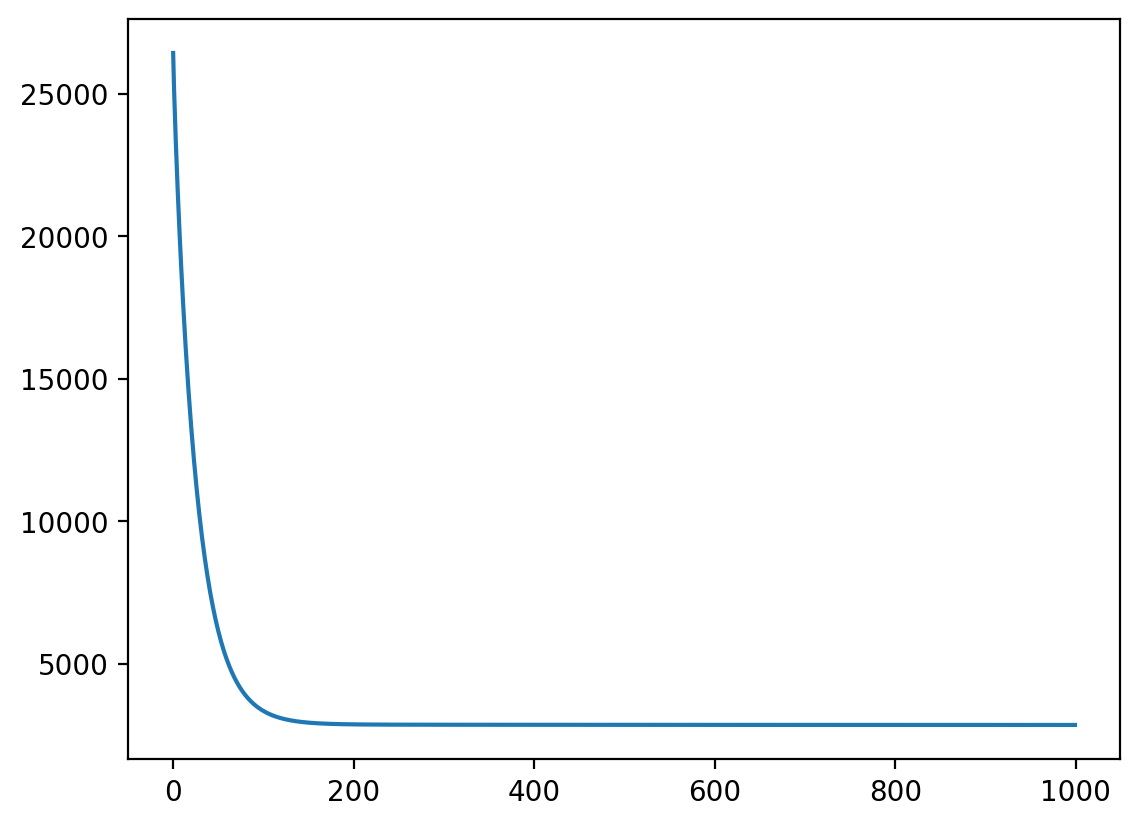

In [10]:
#(8) 하이퍼 파라미터인 학습률 설정하기
#학습률, learning rate 를 설정해주세요
#만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

LEARNING_RATE = 0.99

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

plt.plot(losses)
plt.show()

경사하강법으로 학습을 진행

LEARNING_RATE에 다양한 값을 넣어보고 다양하게 학습을 시켜보았는데 너무 많이 수행하면 나중엔 결국 로스값이 nan이 되어버렸다.


In [ ]:
#(9) 모델 학습하기
#정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
#loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
#입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.



In [ ]:
#(10) test 데이터에 대한 성능 확인하기
#test 데이터에 대한 성능을 확인해주세요.

In [ ]:
#(11) 정답 데이터와 예측한 데이터 시각화하기
#x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

회고

1)이번 프로젝트에서 어려웠던 점
    사실 아직은 모든것이 어렵습니다......
    실행취소 단축키인 ctrl+z를 자주 사용하는데, 셀안에서 사용할경우 의도되로 잘 작동하는데 실수로 셀 밖에서 실행되는 바람에 작성해온 셀들을 자주, 많이 날려먹었습니다.
    자꾸만 shape 에러가 나와서 찾아보니 X가 3차원행렬로 되어 표기할 수 없다는 에러가 자꾸 나왔습니다.
    시간이 오래 걸렸지만 결국 그 원인을 찾았는데 넘파이 어레이변경 단계에서 X = np.array(df_X)가 아닌 X = np.array([df_X])로 정의되어있었기 때문...

2)프로젝트를 진행하면서 본인이 학습한 내용
    깃헙과 비주얼스튜디오의 편리한 연동과 각종 다양한 기능, 작동방법 등
    다양한 상황과 조건들이 수학적으로써 표현이 가능하고 이를 읽고 표현할수 있어야 한다는 점
        

    3)프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
    4)루브릭 평가 지표를 맞추기 위해 시도한 것들
    5)만약에 루브릭 평가 지표를 달성 하지 못했을 때, 이유에 관한 추정
    6)자기 다짐

